In [1]:
#Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
#Load and clean the dataset. Handle missing or inconsistent data.
orders = pd.read_csv("blinkit_orders.csv")
customers = pd.read_csv("blinkit_customers.csv")
delivery = pd.read_csv("blinkit_delivery_performance.csv")


In [59]:
orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [58]:
customers.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [60]:
delivery.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [3]:
orders_full = orders.merge(customers, on="customer_id", how="left").merge(delivery[['order_id', 'delivery_time_minutes']], on="order_id", how="left")

In [4]:
#Perform descriptive statistics for key numeric columns (order totals, delivery times)
print("Order Totals:\n", orders['order_total'].describe())
print("Delivery Times:\n", delivery['delivery_time_minutes'].describe())


Order Totals:
 count    5000.00000
mean     2201.86170
std      1303.02438
min        13.25000
25%      1086.21500
50%      2100.69000
75%      3156.88250
max      6721.46000
Name: order_total, dtype: float64
Delivery Times:
 count    5000.000000
mean        4.443000
std         8.063929
min        -5.000000
25%        -1.000000
50%         2.000000
75%         8.000000
max        30.000000
Name: delivery_time_minutes, dtype: float64


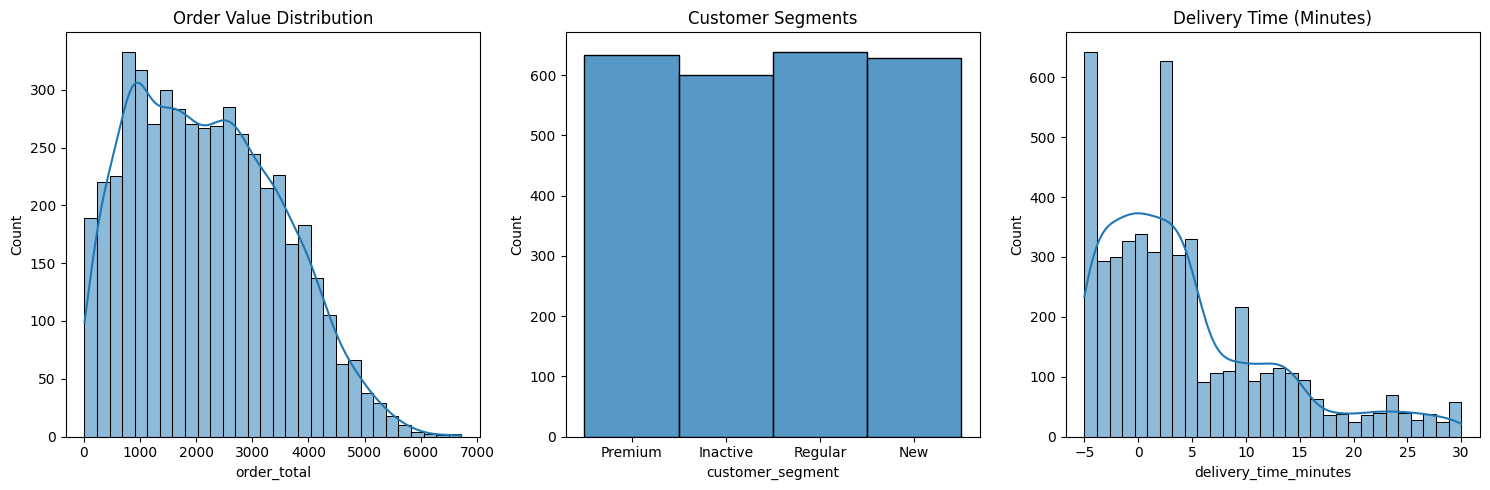

In [103]:
#Visualize distributions of order values, delivery times, and customer segments
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(orders["order_total"], bins=30, kde=True)
plt.title("Order Value Distribution")

plt.subplot(1, 3, 2)
sns.histplot(customers["customer_segment"], bins=30)
plt.title("Customer Segments")

plt.subplot(1, 3, 3)
sns.histplot(delivery["delivery_time_minutes"], bins=30, kde=True)
plt.title("Delivery Time (Minutes)")
plt.tight_layout()
plt.show()

In [7]:
#Sentiment Analysis & Text Processing

In [12]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import string

In [11]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/10.7 MB 6.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.7 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.7 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/10.7 MB 4.8 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/10.7 MB 4.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.7 MB 4.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.7 MB 4.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 4.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 4.4 MB/s eta 0:00:00
   -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
feedback = pd.read_csv("blinkit_customer_feedback.csv")

In [14]:
stopwords = set(["the", "is", "was", "very", "and", "to", "for", "with", "in", "it", "of", "this", "that", "on", "as"])
feedback['cleaned'] = feedback['feedback_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
feedback['cleaned'] = feedback['cleaned'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))


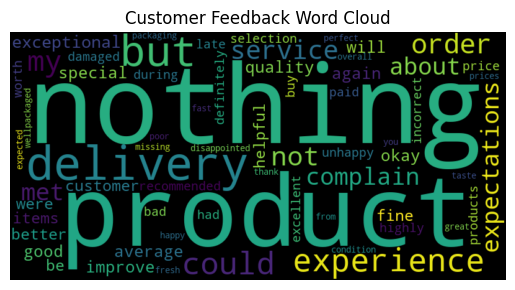

In [15]:
#Analyze customer feedback text for common themes or frequent words (using basic text processing)
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(feedback['cleaned'])
word_freq = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Customer Feedback Word Cloud")
plt.show()


In [16]:
#Correlate sentiment scores with order values or delivery delays.
merged = feedback.merge(orders[['order_id', 'order_total']], on='order_id') \
                 .merge(delivery[['order_id', 'delivery_time_minutes']], on='order_id')

print(merged.groupby('sentiment')[['order_total', 'delivery_time_minutes']].mean())


           order_total  delivery_time_minutes
sentiment                                    
Negative   2210.431425               4.635810
Neutral    2208.048337               4.365938
Positive   2186.538327               4.330247


In [ ]:
#Delivery Time Prediction Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [18]:
features = delivery[['distance_km']].copy()
features['promised_hour'] = pd.to_datetime(delivery['promised_time']).dt.hour
features['partner_id'] = delivery['delivery_partner_id']
target = delivery['delivery_time_minutes']


In [19]:
#Build a regression model to predict delivery time in minutes based on factors like distance, promised time, and delivery partner.
features = pd.get_dummies(features, columns=['partner_id'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [106]:
y_pred

array([4.80508827, 4.62457309, 4.68692178, 4.45955921, 4.6387979 ,
       4.56757633, 4.40333534, 4.43673082, 4.41108016, 4.99420703,
       4.41594015, 4.91762187, 5.00732709, 4.30076769, 4.59133771,
       4.61195662, 4.87834755, 4.672451  , 4.24113207, 4.52523377,
       4.89317349, 4.35238919, 4.44540862, 4.73412434, 4.32768318,
       4.26830519, 4.50589134, 4.36550926, 4.34906332, 4.56450809,
       4.4966124 , 4.55002566, 4.60855654, 4.60302119, 4.37164574,
       4.98023985, 4.52924665, 4.58317517, 4.69714536, 4.25868275,
       4.99727527, 4.68598879, 4.79171057, 4.97972459, 4.69604062,
       4.79886591, 4.68573116, 4.64826025, 4.70898894, 4.51876544,
       4.43169908, 4.34080324, 4.78856811, 4.43485319, 4.28159701,
       4.51655597, 4.47804287, 4.67159224, 4.68872519, 4.56571037,
       4.41959787, 4.28756174, 4.70133   , 4.4941453 , 4.28832297,
       4.36039164, 5.01856954, 4.87588044, 4.49013242, 4.70013938,
       4.65659454, 4.87426045, 4.88277815, 4.61195662, 4.59041

In [22]:
#Evaluate the model’s accuracy and interpret important features.
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 6.0979950130828255
R² Score: -0.00265629395998368


In [ ]:
#Customer Segmentation with KMeans

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [24]:
seg_data = customers[['total_orders', 'avg_order_value']]
seg_scaled = StandardScaler().fit_transform(seg_data)


In [25]:
#Clustering techniques (KMeans or similar) on customer order frequency, average order value, and segment features.
kmeans = KMeans(n_clusters=3, random_state=42)
customers['cluster'] = kmeans.fit_predict(seg_scaled)


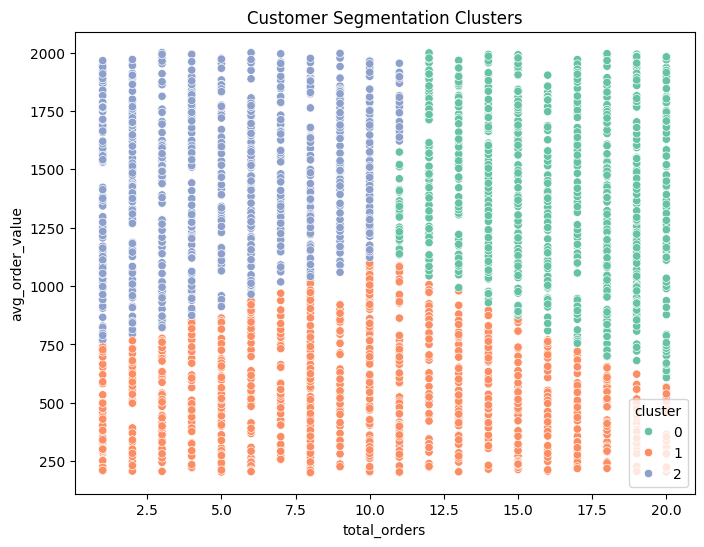

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customers, x='total_orders', y='avg_order_value', hue='cluster', palette='Set2')
plt.title("Customer Segmentation Clusters")
plt.show()


In [ ]:
#Sales Forecasting (Time Series)

In [29]:
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [28]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 5.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 4.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 4.7 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 4.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 4.4 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
daily_sales = orders.groupby(orders['order_date'].dt.date)['order_total'].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)


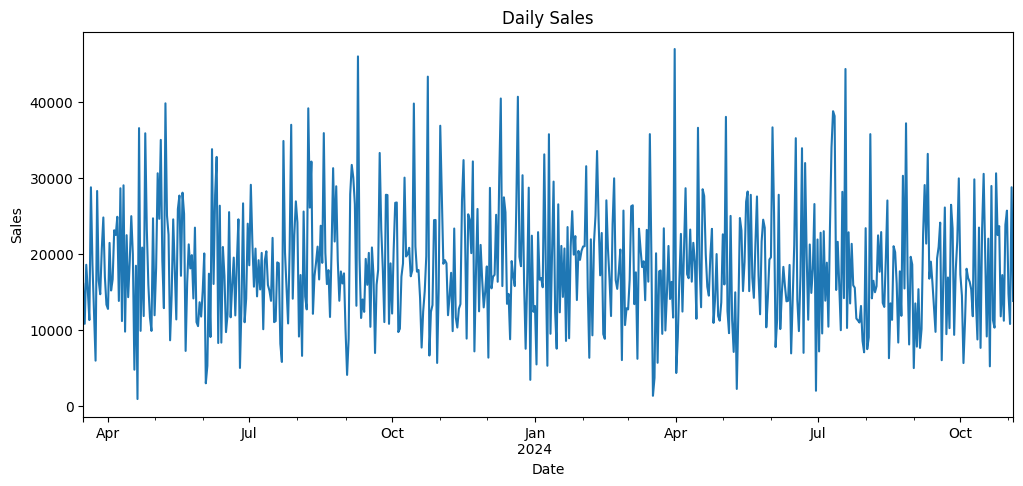

In [31]:
daily_sales.plot(figsize=(12, 5), title="Daily Sales")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()


In [42]:
model = SARIMAX(daily_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = model.fit()


In [41]:
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.asfreq('D')

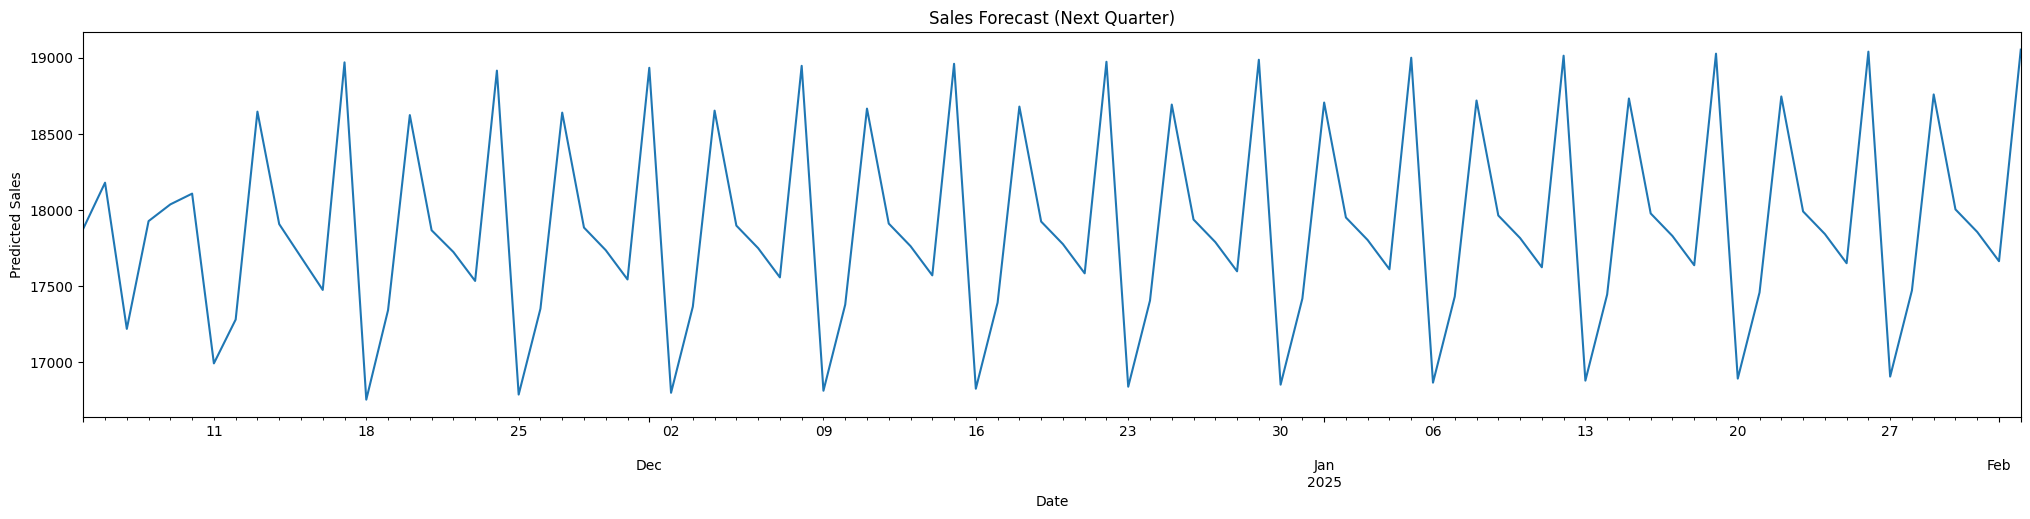

In [43]:
#time series analysis on order totals or revenue to forecast sales for the next quarter.
forecast = result.predict(start=len(daily_sales), end=len(daily_sales)+89)
forecast.plot(figsize=(25, 5), title="Sales Forecast (Next Quarter)")
plt.ylabel("Predicted Sales")
plt.xlabel("Date")
plt.show()
